<a href="https://colab.research.google.com/github/msalmankhan03/Segmentation/blob/main/Birds_Cat_Dog_Segmentation_Using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 144.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import os

In [4]:
rf=Roboflow(api_key=("UVynpeaBPWtSeiT7QTXx"))
project=rf.workspace("salmanworkspace").project("segmentation-for-inovako-company-wbe0b")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Segmentation-for-Inovako-Company-1 in yolov8:: 100%|██████████| 284/284 [00:00<00:00, 11020.79it/s]


# **YOLOv8 SEgmentation**

In [6]:
model=YOLO("yolov8n-seg.pt")

In [9]:
model.train(
    data="/content/Segmentation-for-Inovako-Company-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    optimizer="AdamW",
    lr0=1e-3,
    patience=20,
    device=0,
    workers=2,
    project="yolo_segmentation",
    name="roboflow_exp",
    exist_ok=True
)


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Segmentation-for-Inovako-Company-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=roboflow_exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7853e3532330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

In [11]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/segment/yolo_segmentation/roboflow_exp/weights/best.pt")


In [12]:
metrics = model.val(
    data="/content/Segmentation-for-Inovako-Company-1/data.yaml",
    split="test"   # or "val"
)


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 86 layers, 3,258,649 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 342.9±91.5 MB/s, size: 15.8 KB)
val: Scanning /content/Segmentation-for-Inovako-Company-1/test/labels... 16 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 16/16 1.4Kit/s 0.0s
val: New cache created: /content/Segmentation-for-Inovako-Company-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.2s/it 1.2s
                   all         16         16      0.958          1      0.995      0.776      0.958          1      0.995       0.92
                  bird          5          5      0.971          1      0.995      0.851      0.971          1      0.995      0.935
                   cat          6          6      0.924          1      0.995   

In [13]:
print("\n========= SEGMENTATION METRICS =========")

print(f"Box mAP50      : {metrics.box.map50:.4f}")
print(f"Box mAP50-95   : {metrics.box.map:.4f}")

print(f"Mask mAP50     : {metrics.seg.map50:.4f}")
print(f"Mask mAP50-95  : {metrics.seg.map:.4f}")

print(f"Precision(Box): {metrics.box.mp:.4f}")
print(f"Recall(Box)   : {metrics.box.mr:.4f}")

print(f"Precision(Mask): {metrics.seg.mp:.4f}")
print(f"Recall(Mask)   : {metrics.seg.mr:.4f}")

print("=======================================")



========= SEGMENTATION METRICS =========
Box mAP50      : 0.9950
Box mAP50-95   : 0.7759
Mask mAP50     : 0.9950
Mask mAP50-95  : 0.9195
Precision(Box): 0.9583
Recall(Box)   : 1.0000
Precision(Mask): 0.9583
Recall(Mask)   : 1.0000


In [14]:
names = model.names

print("\n========= PER-CLASS MASK mAP =========")
for i, name in names.items():
    print(f"{name}: mAP50={metrics.seg.maps[i]:.4f}")



========= PER-CLASS MASK mAP =========
bird: mAP50=0.9353
cat: mAP50=0.9082
dog: mAP50=0.9150


In [15]:
model.predict(
    source="/content/cat and dog.jpg",
    conf=0.25,
    save=True
)



image 1/1 /content/cat and dog.jpg: 448x640 2 birds, 52.8ms
Speed: 1.9ms preprocess, 52.8ms inference, 9.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'bird', 1: 'cat', 2: 'dog'}
 obb: None
 orig_img: array([[[108, 103, 102],
         [108, 103, 102],
         [108, 103, 102],
         ...,
         [251, 243, 250],
         [251, 243, 250],
         [251, 243, 250]],
 
        [[108, 103, 102],
         [108, 103, 102],
         [108, 103, 102],
         ...,
         [251, 243, 250],
         [251, 243, 250],
         [251, 243, 250]],
 
        [[108, 103, 102],
         [108, 103, 102],
         [108, 103, 102],
         ...,
         [251, 243, 250],
         [251, 243, 250],
         [251, 243, 250]],
 
        ...,
 
        [[172, 177, 186],
         [172, 177, 186],
         [172, 177, 186],
         ...,
         [169, 158, 166],
         [169, 158, 166],
         [169, 158, 166]],
 
        [[180, 185, 194],
         [180, 185, 194],
     

(np.float64(-0.5), np.float64(274.5), np.float64(182.5), np.float64(-0.5))

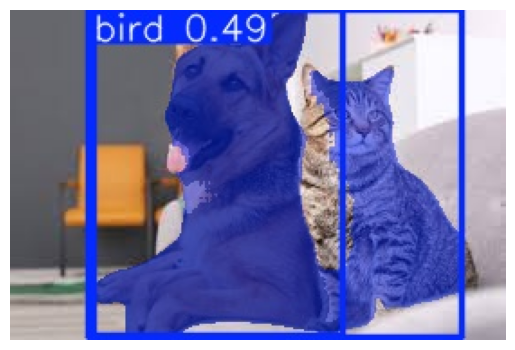

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/segment/predict/cat and dog.jpg")
plt.imshow(img)
plt.axis("off")


In [18]:
model.predict(
    source="/content/images.jpg",
    conf=0.25,
    save=True
)


image 1/1 /content/images.jpg: 320x640 2 dogs, 54.1ms
Speed: 4.5ms preprocess, 54.1ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 640)
Results saved to /content/runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'bird', 1: 'cat', 2: 'dog'}
 obb: None
 orig_img: array([[[173, 183, 183],
         [173, 183, 183],
         [174, 184, 184],
         ...,
         [124, 128, 129],
         [ 92,  96,  97],
         [ 66,  70,  71]],
 
        [[173, 183, 183],
         [174, 184, 184],
         [174, 184, 184],
         ...,
         [124, 128, 129],
         [ 92,  96,  97],
         [ 66,  70,  71]],
 
        [[174, 184, 184],
         [174, 184, 184],
         [175, 185, 185],
         ...,
         [125, 127, 128],
         [ 93,  95,  96],
         [ 67,  69,  70]],
 
        ...,
 
        [[ 75,  66,  63],
         [ 74,  65,  62],
         [ 73,  64,  61],
         ...,
         [ 78,  75,  77],
         [ 80,  77,  79],
         [ 85,  82,  84]],
 
        [[ 75,  66,  63],
         [ 74,  65,  62],
     

(np.float64(-0.5), np.float64(324.5), np.float64(154.5), np.float64(-0.5))

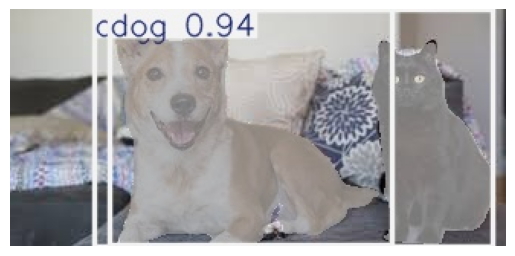

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/segment/predict/images.jpg")
plt.imshow(img)
plt.axis("off")